#  Bay Wheels's trip data - 2019 Analysis
## by Jaroslav Tran

## Investigation Overview
### Introduction
Bay Wheels is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States (source: Wikipedia)

### Goal
The overall goal of this presentation is to explore a FordBike 2019 dataset and showcase key differences between two User Types of this service: Customers and Subscribers.

### Dataset Overview

The dataset contains BayWheels trip data available for public use. It contains over 2.5M data points and 15 variables for the year of 2019. To aggregate it, I needed to download datasets for each month in 2019 and merge them together into a master dataset. The monthly datasets are available here: https://www.lyft.com/bikes/bay-wheels/system-data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import glob
import os
import datetime

## 1. Data Gathering

In [2]:
path = r'C:\Users\Jaroslav Tran\Desktop\Analytical Skills\Udacity Data Analyst Nano Degree\P5-Data Vizualization\FordGoBikeData\2019'

files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in files), ignore_index = True, )

df.to_csv('fordgobikedata_master.csv', index = False)

C:\Users\Jaroslav Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  """
C:\Users\Jaroslav Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  """
C:\Users\Jaroslav Tran\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [3]:
df = pd.read_csv('fordgobikedata_master.csv', low_memory=False)

## 2. Data Assessment

In [4]:
df.shape

(2506983, 15)

In [5]:
df.tail(10)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
2506973,551068,NaN,2336,NaN,37.829645,-122.483233,NaN,2019-12-28 15:28:15,app,NaN,37.809270,-122.475898,NaN,2019-12-28 14:49:19,Subscriber
2506974,593917,NaN,2297,NaN,37.829634,-122.483242,NaN,2019-12-28 15:27:34,app,NaN,37.809275,-122.475875,NaN,2019-12-28 14:49:17,Subscriber
2506975,326273,NaN,1816,NaN,37.776921,-122.419472,NaN,2019-12-27 18:28:40,app,NaN,37.809291,-122.414682,NaN,2019-12-27 17:58:23,Subscriber
2506976,607037,NaN,687,NaN,37.807259,-122.410570,NaN,2019-12-24 18:32:47,app,NaN,37.809576,-122.412358,NaN,2019-12-24 18:21:20,Customer
2506977,167109,NaN,711,NaN,37.807330,-122.410621,NaN,2019-12-24 18:33:33,app,NaN,37.809578,-122.412348,NaN,2019-12-24 18:21:41,Customer
2506978,719651,NaN,731,NaN,37.807573,-122.421681,NaN,2019-12-28 18:49:40,app,NaN,37.809731,-122.409855,NaN,2019-12-28 18:37:29,Subscriber
2506979,655411,NaN,748,NaN,37.807558,-122.421638,NaN,2019-12-28 18:49:53,app,NaN,37.809768,-122.409797,NaN,2019-12-28 18:37:24,Subscriber
2506980,936881,NaN,1044,NaN,37.807225,-122.408850,NaN,2019-12-26 14:43:02,app,NaN,37.810183,-122.410271,NaN,2019-12-26 14:25:37,Subscriber
2506981,397539,NaN,326,NaN,37.803143,-122.414373,NaN,2019-12-30 20:41:09,app,NaN,37.810471,-122.417386,NaN,2019-12-30 20:35:43,Subscriber
2506982,662304,NaN,4023,NaN,37.810970,-122.418054,NaN,2019-12-31 20:33:52,app,NaN,37.811042,-122.418149,NaN,2019-12-31 19:26:48,Subscriber


In [6]:
df.sample(10)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
445062,1821,No,1460,105.0,37.764285,-122.431804,16th St at Prosper St,2019-03-23 16:18:52.3290,NaN,141.0,37.747998,-122.420219,Valencia St at Cesar Chavez St,2019-03-23 15:54:32.2700,Customer
1571795,1649,No,752,133.0,37.755213,-122.420975,Valencia St at 22nd St,2019-08-21 22:22:12.4490,NaN,75.0,37.773793,-122.421239,Market St at Franklin St,2019-08-21 22:09:40.3260,Subscriber
140558,5548,No,347,343.0,37.783172,-122.393572,Bryant St at 2nd St,2019-01-10 19:00:45.8250,NaN,90.0,37.771058,-122.402717,Townsend St at 7th St,2019-01-10 18:54:58.2420,Subscriber
1981839,10772,No,2106,129.0,37.758862,-122.412544,Harrison St at 20th St,2019-10-25 07:32:38.3560,NaN,435.0,37.729393,-122.386537,Jennings St at Revere Ave,2019-10-25 06:57:32.1870,Customer
1765235,11418,No,891,66.0,37.778742,-122.392741,3rd St at Townsend St,2019-09-24 08:25:25.8990,NaN,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2019-09-24 08:10:34.1580,Customer
462713,4035,Yes,469,327.0,37.332039,-121.881766,5th St at San Salvador St,2019-03-21 10:58:37.6830,NaN,299.0,37.323678,-121.874119,Bestor Art Park,2019-03-21 10:50:48.2400,Subscriber
2273,426,No,256,158.0,37.833279,-122.263490,Shattuck Ave at Telegraph Ave,2019-01-31 18:19:51.5120,NaN,176.0,37.828410,-122.266315,MacArthur BART Station,2019-01-31 18:15:34.6310,Subscriber
617538,1375,No,420,123.0,37.760594,-122.414817,Folsom St at 19th St,2019-03-03 15:25:23.4570,NaN,136.0,37.754436,-122.404364,23rd St at San Bruno Ave,2019-03-03 15:18:23.4190,Customer
1207797,877,No,932,3.0,37.786375,-122.404904,Powell St BART Station (Market St at 4th St),2019-06-06 09:46:02.5450,NaN,122.0,37.760299,-122.418892,19th St at Mission St,2019-06-06 09:30:29.9880,Subscriber
1934084,12191,No,109,21.0,37.789625,-122.400811,Montgomery St BART Station (Market St at 2nd St),2019-10-31 17:29:11.6080,NaN,25.0,37.786928,-122.398113,Howard St at 2nd St,2019-10-31 17:27:22.4400,Subscriber


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
rental_access_method       object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


In [8]:
df.isnull().sum()

bike_id                          0
bike_share_for_all_trip     120838
duration_sec                     0
end_station_id               82902
end_station_latitude             0
end_station_longitude            0
end_station_name             82350
end_time                         0
rental_access_method       2386145
start_station_id             80734
start_station_latitude           0
start_station_longitude          0
start_station_name           80133
start_time                       0
user_type                        0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().sum()

bike_id                          0
bike_share_for_all_trip     120838
duration_sec                     0
end_station_id               82902
end_station_latitude             0
end_station_longitude            0
end_station_name             82350
end_time                         0
rental_access_method       2386145
start_station_id             80734
start_station_latitude           0
start_station_longitude          0
start_station_name           80133
start_time                       0
user_type                        0
dtype: int64

In [11]:
df["rental_access_method"].value_counts()

app        108010
clipper     12828
Name: rental_access_method, dtype: int64

In [12]:
df.describe()

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,start_station_id,start_station_latitude,start_station_longitude
count,2.506983e+06,2.506983e+06,2.424081e+06,2.506983e+06,2.506983e+06,2.426249e+06,2.506983e+06,2.506983e+06
mean,2.789833e+04,8.076483e+02,1.427044e+02,3.776422e+01,-1.223459e+02,1.465047e+02,3.776506e+01,-1.223499e+02
std,1.146067e+05,1.974714e+03,1.214296e+02,2.392885e-01,7.080417e-01,1.223171e+02,1.363698e-01,3.089648e-01
min,4.000000e+00,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02
25%,1.952000e+03,3.590000e+02,4.300000e+01,3.777003e+01,-1.224117e+02,4.700000e+01,3.776931e+01,-1.224130e+02
50%,4.420000e+03,5.710000e+02,1.010000e+02,3.778076e+01,-1.223981e+02,1.050000e+02,3.778053e+01,-1.223983e+02
75%,9.682000e+03,8.870000e+02,2.390000e+02,3.779587e+01,-1.222934e+02,2.430000e+02,3.779539e+01,-1.222914e+02
max,9.999410e+05,9.121100e+05,4.980000e+02,4.551000e+01,0.000000e+00,4.980000e+02,4.551000e+01,0.000000e+00


### Data Quality Issues

<ol>
    <li> Start and End time are object. They should be in a timestamp format.</li>
    <li> Bike_id, end_station_id, start_station_id are either floats or ints. They should be objects. </li>
    <li> Quite a few missing or null values throughout the dataset (bike_share_for_all_trip, end_station_id, end_station_name, rental_access_method, start_station_id, start_station_name)</li>
</ol>

### Data Tidiness Issues

<ol>
    <li> Not necessarily an issue but the duration is in seconds, which is not very informative so we will convert it.</li>
</ol>

In [13]:
# Making a copy before we start the cleaning process
df_cleaned = df.copy()

### Define
<li> Start and End time are object. They should be in a timestamp format.</li>
<li> For better analysis, it would be good to extract a month, weekday and hour from the timestamp </li>
<li> Action: Converting start and endtime to timestamp using astype function. </li>

### Clean

In [14]:
# Converting start time and end time to datetime datatype
df_cleaned['start_time'] = df_cleaned['start_time'].astype('datetime64')
df_cleaned['end_time'] = df_cleaned['end_time'].astype('datetime64')

# Extracting month start and end time
df_cleaned['month_start_time'] = df_cleaned['start_time'].dt.strftime('%B')
df_cleaned['month_end_time'] = df_cleaned['end_time'].dt.strftime('%B')

# Extracting weekday start and end time
df_cleaned['weekday_start_time'] = df_cleaned['start_time'].dt.strftime('%a')
df_cleaned['weekday_end_time'] = df_cleaned['end_time'].dt.strftime('%a')

# Extracting hour from start and end time
df_cleaned['hour_start_time'] = df_cleaned['start_time'].dt.hour
df_cleaned['hour_end_time'] = df_cleaned['end_time'].dt.hour

### Test

In [15]:
df_cleaned.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,...,start_station_longitude,start_station_name,start_time,user_type,month_start_time,month_end_time,weekday_start_time,weekday_end_time,hour_start_time,hour_end_time
0,4861,No,80825,196.0,37.808894,-122.256460,Grand Ave at Perkins St,2019-02-01 16:24:49.864,NaN,229.0,...,-122.213037,Foothill Blvd at 42nd Ave,2019-01-31 17:57:44.613,Subscriber,January,February,Thu,Fri,17,16
1,5506,No,65900,134.0,37.752428,-122.420628,Valencia St at 24th St,2019-02-01 15:16:54.173,NaN,4.0,...,-122.408915,Cyril Magnin St at Ellis St,2019-01-31 20:58:33.886,Subscriber,January,February,Thu,Fri,20,15
2,2717,No,62633,157.0,37.846784,-122.291376,65th St at Hollis St,2019-02-01 11:30:46.530,NaN,245.0,...,-122.268422,Downtown Berkeley BART,2019-01-31 18:06:52.924,Customer,January,February,Thu,Fri,18,11
3,4557,No,44680,53.0,37.775946,-122.437777,Grove St at Divisadero,2019-02-01 08:10:50.318,NaN,85.0,...,-122.429156,Church St at Duboce Ave,2019-01-31 19:46:09.719,Customer,January,February,Thu,Fri,19,8
4,2100,No,60709,28.0,37.787168,-122.388098,The Embarcadero at Bryant St,2019-02-01 07:10:51.065,NaN,16.0,...,-122.394430,Steuart St at Market St,2019-01-31 14:19:01.541,Customer,January,February,Thu,Fri,14,7


In [16]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 21 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
rental_access_method       object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  object
month_start_time           object
month_end_time             object
weekday_start_time         object
weekday_end_time           object
hour_start_time            int64
hour_end_time              int64
dtypes: datetime64[ns](2), float64(6), int64(4), object(9)
memory usage: 401.7+ MB


### Define
<li> Issue: Bike_id, end_station_id, start_station_id are either floats or ints. They should be objects. </li>
<li> Action: Converting them into object using astype function. </li>

### Code

In [17]:
# Converting bike_id, end_station_id and start_station_id to string format
df_cleaned['bike_id'] = df_cleaned['bike_id'].astype(str)
df_cleaned['end_station_id'] = df_cleaned['end_station_id'].astype(str)
df_cleaned['start_station_id'] = df_cleaned['start_station_id'].astype(str);

### Test

In [18]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 21 columns):
bike_id                    object
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             object
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
rental_access_method       object
start_station_id           object
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  object
month_start_time           object
month_end_time             object
weekday_start_time         object
weekday_end_time           object
hour_start_time            int64
hour_end_time              int64
dtypes: datetime64[ns](2), float64(4), int64(3), object(12)
memory usage: 401.7+ MB


### Define
<li> Issue: Quite a few missing or null values throughout the dataset (bike_share_for_all_trip, end_station_id, end_station_name, rental_access_method, start_station_id, start_station_name)</li>
<li> Action: Nothing for now. We will see if it impacts our analysis anyhow and fix it if needed.</li>    

### Code

### Test

### Define
<ol>
    <li> Issue: Not necessarily a data quality issue but the duration is in seconds, which is not very informative so we will convert it.</li>
    <li> Action: Convert the duration to minutes by dividing the number by 60. </li>
</ol>

### Code

In [19]:
df_cleaned["duration_min"] = df_cleaned["duration_sec"] / 60
df_cleaned["duration_min"] = df_cleaned["duration_min"].astype(int)

### Test

In [20]:
df_cleaned.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,...,start_station_name,start_time,user_type,month_start_time,month_end_time,weekday_start_time,weekday_end_time,hour_start_time,hour_end_time,duration_min
0,4861,No,80825,196.0,37.808894,-122.256460,Grand Ave at Perkins St,2019-02-01 16:24:49.864,NaN,229.0,...,Foothill Blvd at 42nd Ave,2019-01-31 17:57:44.613,Subscriber,January,February,Thu,Fri,17,16,1347
1,5506,No,65900,134.0,37.752428,-122.420628,Valencia St at 24th St,2019-02-01 15:16:54.173,NaN,4.0,...,Cyril Magnin St at Ellis St,2019-01-31 20:58:33.886,Subscriber,January,February,Thu,Fri,20,15,1098
2,2717,No,62633,157.0,37.846784,-122.291376,65th St at Hollis St,2019-02-01 11:30:46.530,NaN,245.0,...,Downtown Berkeley BART,2019-01-31 18:06:52.924,Customer,January,February,Thu,Fri,18,11,1043
3,4557,No,44680,53.0,37.775946,-122.437777,Grove St at Divisadero,2019-02-01 08:10:50.318,NaN,85.0,...,Church St at Duboce Ave,2019-01-31 19:46:09.719,Customer,January,February,Thu,Fri,19,8,744
4,2100,No,60709,28.0,37.787168,-122.388098,The Embarcadero at Bryant St,2019-02-01 07:10:51.065,NaN,16.0,...,Steuart St at Market St,2019-01-31 14:19:01.541,Customer,January,February,Thu,Fri,14,7,1011


In [21]:
df_cleaned.to_csv('fordgobike2019_cleaned.csv', encoding = 'utf-8', index=False)

## Univariate Exploration

In [22]:
df_cleaned["user_type"].value_counts()

Subscriber    2021166
Customer       485817
Name: user_type, dtype: int64

### 1. The bike trip distribution among each user type

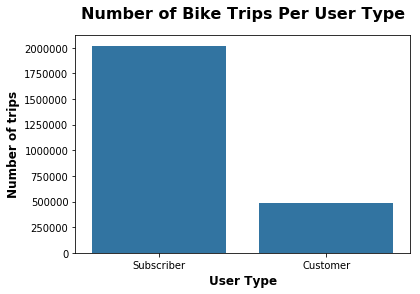

In [38]:
# Setting the color palette to blue
base_color = sb.color_palette()[0]

# Generating countplot using seaborn library
user_type_plot = sb.countplot(data = df_cleaned, x = "user_type", color = base_color).set_title('Number of Bike Trips Per User Type', y = 1.05, fontsize = 16, fontweight = 'bold')
plt.xlabel("User Type", fontsize = 12, weight = "bold")
plt.ylabel("Number of trips", fontsize = 12, weight = "bold");

### Comments 
The vast majority of the bike trips come from subscribers of the platform.

In [39]:
df_cleaned["bike_share_for_all_trip"].value_counts()

No     2203584
Yes     182561
Name: bike_share_for_all_trip, dtype: int64

### 2. The bike trip distribution among each shared and unshared trips

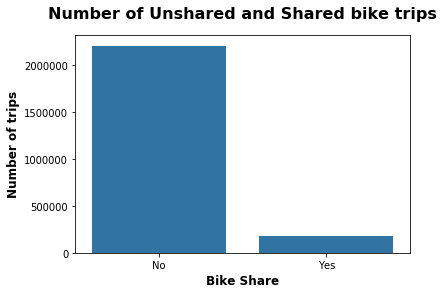

In [40]:
# Setting the color palette to blue
base_color = sb.color_palette()[0]

# Generating countplot using seaborn library
shared_plot = sb.countplot(data = df_cleaned, x = 'bike_share_for_all_trip', color = base_color).set_title('Number of Unshared and Shared bike trips',  y = 1.05, fontsize = 16, fontweight = 'bold')
plt.xlabel("Bike Share", fontsize = 12, weight = "bold")
plt.ylabel("Number of trips", fontsize = 12, weight = "bold");

### Comments 
The vast majority of the bike trips are not shared

### 3. The bike trip distribution each month

In [41]:
df_cleaned["month_start_time"].value_counts()

July         258102
March        256299
October      239895
April        239111
September    217986
August       210563
January      192082
June         191772
November     185496
February     183412
May          182163
December     150102
Name: month_start_time, dtype: int64

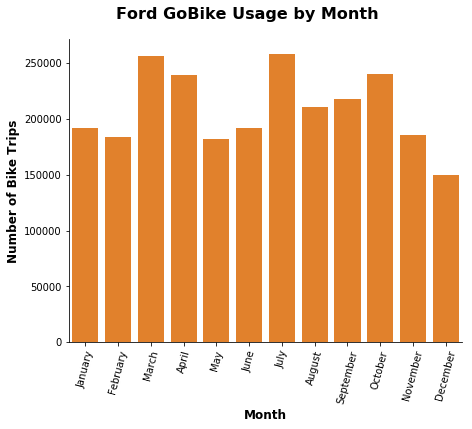

In [42]:
# Setting the color palette to orange
base_color = sb.color_palette()[1]

# Generating catplot using seaborn
monthly_usage = sb.catplot(data = df_cleaned, x = 'month_start_time', kind = 'count', color = base_color, aspect = 1.3)
# Specifying labels and title
plt.xlabel('Month', fontsize = 12, weight = "bold")
plt.ylabel('Number of Bike Trips', fontsize = 12, weight = "bold")
monthly_usage.fig.suptitle('Ford GoBike Usage by Month', y = 1.05, fontsize = 16, fontweight = 'bold')
monthly_usage.set_xticklabels(rotation=75);

### Comments
July, March and October are the most busy months. Surprisingly, May is the second least busy month.

### 4. The bike trip distribution each weekday

In [47]:
df_cleaned["weekday_start_time"].value_counts()

Tue    427640
Thu    424474
Wed    414448
Fri    397284
Mon    396463
Sat    234370
Sun    212304
Name: weekday_start_time, dtype: int64

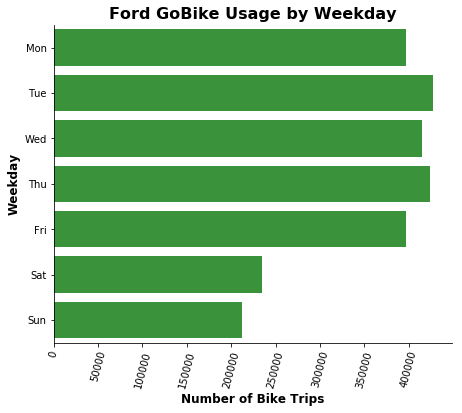

In [49]:
# Setting the color palette to green and standardized plot size
base_color = sb.color_palette()[2]

# Creating weekday labels to have the chart ordered based on the weekday
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
# Using seaborn to generate catplot
weekday_usage = sb.catplot(data = df_cleaned, y = 'weekday_start_time', kind = 'count', aspect = 1.3, color = base_color, order = weekday_labels);
# Specifying labels and title
plt.xlabel('Number of Bike Trips', fontsize = 12, weight = "bold")
plt.ylabel('Weekday', fontsize = 12, weight = "bold")
plt.title('Ford GoBike Usage by Weekday', y = 1.05, fontsize = 16, fontweight = 'bold')
weekday_usage.set_xticklabels(rotation=75);

### Comments
Mid-week (Tue, Wed, Thu) are the busiest days. Weekends are the least busy days. 

### 5. The bike trip distribution each hour of the day

In [46]:
df_cleaned["hour_start_time"].value_counts()

17    296831
8     278632
18    233587
9     215877
16    193253
19    143924
7     142099
15    124925
12    114164
13    111727
10    110032
14    108157
11    103194
20     92283
21     65063
6      53574
22     44412
23     26393
0      14686
5      13479
1       8788
2       5682
4       3442
3       2779
Name: hour_start_time, dtype: int64

<Figure size 1058.4x595.44 with 0 Axes>

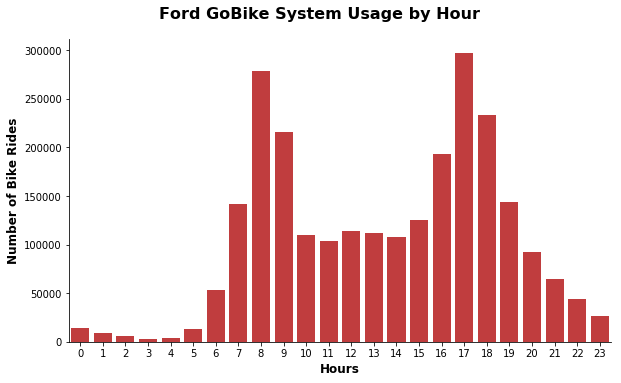

In [45]:
# Mixing up a color palette
base_color = sb.color_palette()[3]

# Generating catplot using seaborn
hourly_usage = sb.catplot(data = df_cleaned, x='hour_start_time', kind='count', color = base_color, aspect = 1.7)
# Creating associted lebals and titles
plt.xlabel('Hours', fontsize = 12, weight = 'bold')
plt.ylabel('Number of Bike Rides', fontsize = 12, weight = 'bold')
hourly_usage.fig.suptitle('Ford GoBike System Usage by Hour', y=1.05, fontsize=16, fontweight='bold');

### 6. A distribution of the bike trip duration in minutes

In [51]:
df_cleaned["duration_min"].describe()

count    2.506983e+06
mean     1.296946e+01
std      3.291311e+01
min      1.000000e+00
25%      5.000000e+00
50%      9.000000e+00
75%      1.400000e+01
max      1.520100e+04
Name: duration_min, dtype: float64

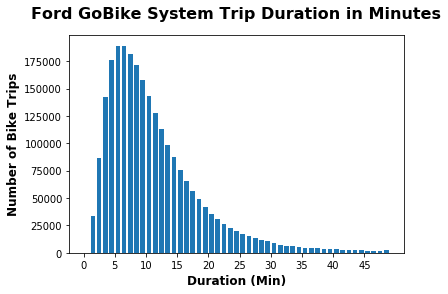

In [55]:
# Setting up bin edges
bin_edges = np.arange(0, 50, 1)

# Setting up my own ticks 
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]

# Generating histogram using the bin edges set above
plt.hist(data = df_cleaned, x = 'duration_min', bins = bin_edges, rwidth = 0.75)

# Creating associated labels and titles
plt.title("Ford GoBike System Trip Duration in Minutes", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Min)', y = 1.05, fontsize = 12, fontweight = 'bold')
plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips', fontsize = 12, fontweight = 'bold');

### Comments
Right-skewed distribution. The average trip duration is around 12.9 minutes. 75% of the trips are below 14 minutes. 
The shortest trip took 1 minute and the longest one 15201 minutes

## Bivariate Exploration

### 1. Trip duration (minutes) between different user types

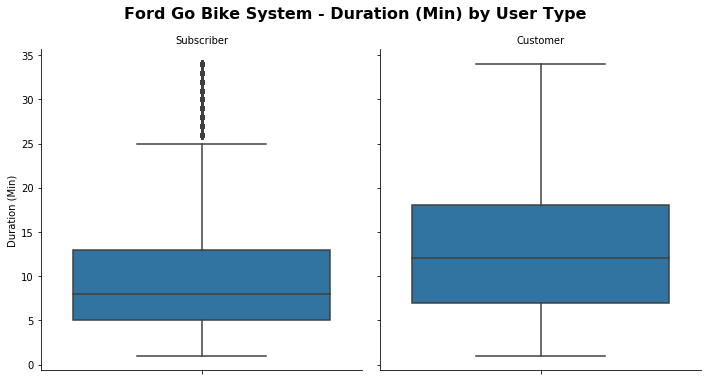

In [61]:
# Creating a reasonable duration subset ignoring extreme outliers 
subset_duration = df_cleaned.query("duration_min < 35")

# Generating two side by side box plots
duration_by_user_type = sb.catplot(data=subset_duration, y='duration_min', col="user_type", kind='box')

# Generating labels and titles
duration_by_user_type.set_titles(col_template = '{col_name}')
duration_by_user_type.set_axis_labels("", "Duration (Min)")
duration_by_user_type.fig.suptitle('Ford Go Bike System - Duration (Min) by User Type', y=1.05, fontsize=16, fontweight='bold');

### Comments
Subscribers tend to take shorter trips than customers with lower average duration and lower quartiles overall.

### 2. Trip duration (minutes) between bikesharing

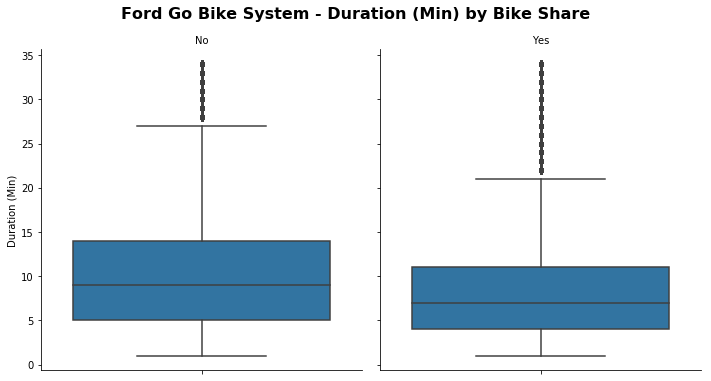

In [62]:
# Creating two side by side boxplots for bike share 
duration_by_bike_share = sb.catplot(data=subset_duration, y='duration_min', col="bike_share_for_all_trip", kind='box')

# Setting up titles and labels
duration_by_bike_share.set_titles(col_template = '{col_name}')
duration_by_bike_share.set_axis_labels("", "Duration (Min)")
duration_by_bike_share.fig.suptitle('Ford Go Bike System - Duration (Min) by Bike Share', y=1.05, fontsize=16, fontweight='bold');

### Comments
Bike sharers had shorter trips on average with all the quartiles lower overall.

### 3. Month by month usage, Customer vs Subscriber

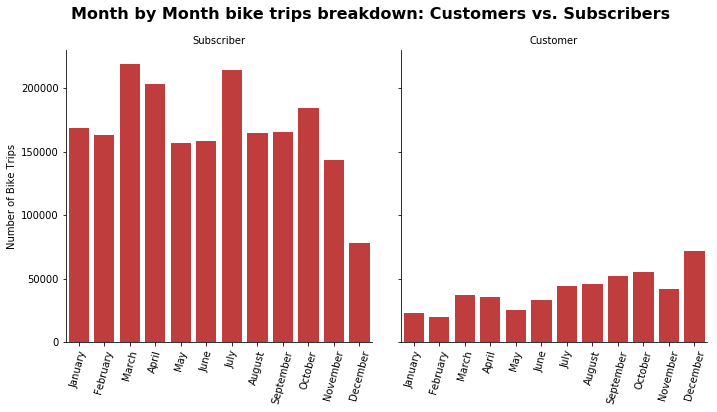

In [63]:
base_color = sb.color_palette()[3]
user_type_by_month = sb.catplot(data=df_cleaned, x='month_start_time', col="user_type", kind='count', sharey = True, color = base_color);

user_type_by_month.set_axis_labels("", "Number of Bike Trips");
user_type_by_month.set_titles("{col_name}");

user_type_by_month.fig.suptitle('Month by Month bike trips breakdown: Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');
user_type_by_month.set_xticklabels(rotation=75);

### Comments
March, April and July are the most in demand months for Subscribers and
surprisingly, December, October and September are the most in demand months for Customers

## Multivariate Exploration

### 1. Analyzing weekday trip duration by user type

Text(0.5, 1.05, 'Weekday trip duration by user type')

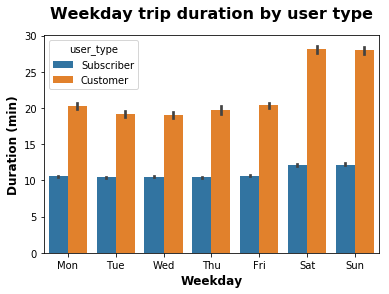

In [67]:
# Generating pointplot and assigning x,y and z(hue) variable
weekday_dur_per_user_type = sb.barplot(data = df_cleaned, x = 'weekday_start_time', y = 'duration_min', hue = 'user_type',
                  dodge = 0.3, order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Setting up labels and titles
plt.xlabel("Weekday", y = 1.05, fontsize = 12, fontweight = 'bold')
plt.ylabel("Duration (min)", fontsize = 12, fontweight = 'bold')
plt.title("Weekday trip duration by user type", y=1.05, fontsize=16, fontweight="bold")

### Comments
The longest trips happen during the weekend for both user types
The shortest trip for customers happen on Wednesday and Tuesday for both user types

### 2. Analyzing hour by hour trip duration by user type

Text(0.5, 1.05, 'Hour by hour trip duration by user type')

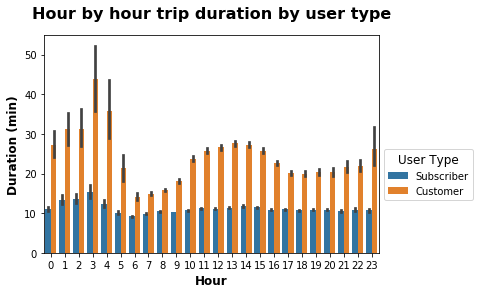

In [73]:
# Generating pointplot and assigning x,y and z(hue) variables
hour_dur_per_user_type = sb.barplot(data = df_cleaned, x = 'hour_start_time', y = 'duration_min', hue = 'user_type', 
                                      dodge = 0.3)

# Setting up labels and titles
plt.xlabel("Hour", y = 1.05, fontsize = 12, fontweight = 'bold')
plt.ylabel("Duration (min)", fontsize = 12, fontweight = 'bold')
plt.legend(bbox_to_anchor=(1, 0.5), title="User Type", title_fontsize = 12);
plt.title("Hour by hour trip duration by user type", y=1.05, fontsize=16, fontweight="bold")

### Comments
For both subscribers and customers, the longest trips happen during night hours between 1 and 4 AM (maybe people biking drunk? :D).

### 3. Trip duration per user type and bikeshare

Text(0.5, 1.05, 'Trip duration by user type and bikeshare')

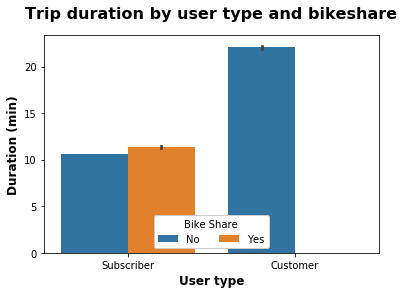

In [70]:
# Using seaborn to generate barplot
dur_per_usertype_and_bikeshare = sb.barplot(data = df_cleaned, x = 'user_type', y = 'duration_min', hue = 'bike_share_for_all_trip')

# Adding a legend and put it into the midle
dur_per_usertype_and_bikeshare.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Bike Share')

# Adding labels and title
plt.xlabel("User type", y = 1.05, fontsize = 12, fontweight = 'bold' )
plt.ylabel("Duration (min)", fontsize = 12, fontweight = 'bold')
plt.title("Trip duration by user type and bikeshare", y=1.05, fontsize=16, fontweight="bold")

### Comments
For subscribers, the trip duration is more or less the same for bike sharers and non-bike sharers
Customers don´t bike share at all

### 4. Weekday bike trips by User Type

Text(0.5, 1.05, 'Weekday bike trips by User Type')

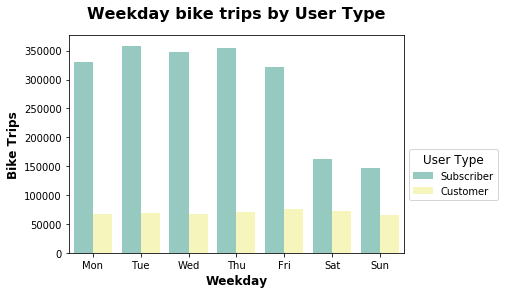

In [76]:
# Generating seaborn countplot with a nice palette
weekly_bike_trips_by_user = sb.countplot(data = df_cleaned, x = 'weekday_start_time', hue = 'user_type', palette = 'Set3',
                                        order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Adding labels and title
plt.xlabel("Weekday", y = 1.05, fontsize = 12, fontweight = 'bold')
plt.ylabel("Bike Trips", fontsize = 12, fontweight = 'bold')
plt.legend(bbox_to_anchor=(1, 0.5), title="User Type", title_fontsize = 12);
plt.title("Weekday bike trips by User Type", y=1.05, fontsize=16, fontweight="bold")

### Comments
For both user types, the most weekend bike trips happen during the weekdays and the least during the weekends

### 5. Hour by hour bike trips by User Type

Text(0.5, 1.05, 'Hour by hour bike trips by User Type')

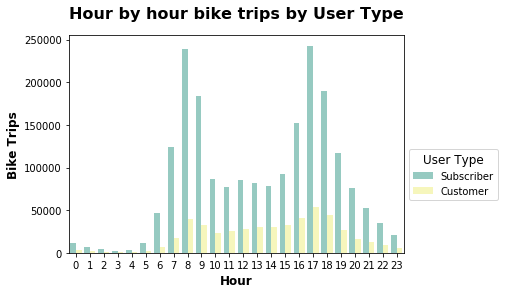

In [75]:
# Generating seaborn countplot
hourly_bike_trips_by_user = sb.countplot(data = df_cleaned, x = 'hour_start_time', hue = 'user_type', palette = 'Set3')

# Adding labels and title
plt.xlabel("Hour", y = 1.05, fontsize = 12, fontweight = 'bold')
plt.ylabel("Bike Trips", fontsize = 12, fontweight = 'bold')
plt.legend(bbox_to_anchor=(1, 0.5), title="User Type", title_fontsize = 12);
plt.title("Hour by hour bike trips by User Type", y=1.05, fontsize=16, fontweight="bold")

### Comments
The most bike trips for both user types happen around 8 am and 5 pm, reflecting the typical workday commuting times perfectly

## Summary
There are two primarily users with distinct behaviors:
<li> Subscribers. Who exhibit a behavior of daily commuters, using this service primarily for commuting from and to work as a solid substitute to the public transporation or cars. </li>
<li> Customers. Who exhibit a behavior of visitors or tourists, using this service throughout the day to Explore the hidden gems of San Francisco and Bay Area.  </li>


### Sources
<ol>
    <li>Dataset: https://www.lyft.com/bikes/bay-wheels/system-data </li>
    <li>Seaborn documentation: https://seaborn.pydata.org/ </li>
    <li>Matplotlib documentation: https://matplotlib.org/3.2.0/contents.html </li>
    <li>Plotting: https://medium.com/@purnasaigudikandula/exploratory-data-analysis-beginner-univariate-bivariate-and-multivariate-habberman-dataset-2365264b751 </li>
    <li>Plotting: https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python</li>
    <li> Converting notebooks to slides: https://medium.com/@mjspeck/presenting-code-using-jupyter-notebook-slides-a8a3c3b59d67</li>
    <li> Converting notebooks to slides: https://stackoverflow.com/questions/53186944/accommodating-large-slides-in-jupyter-presentation</li>
    </ol>